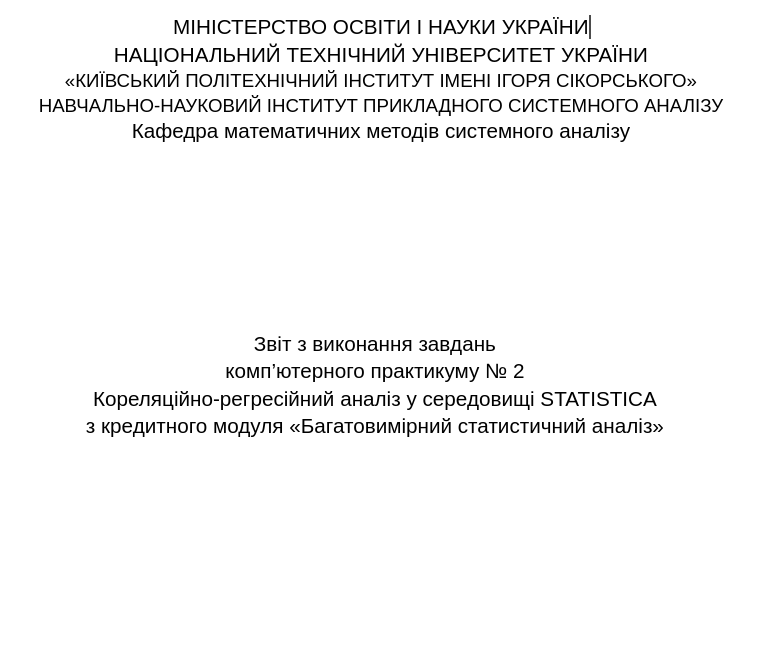

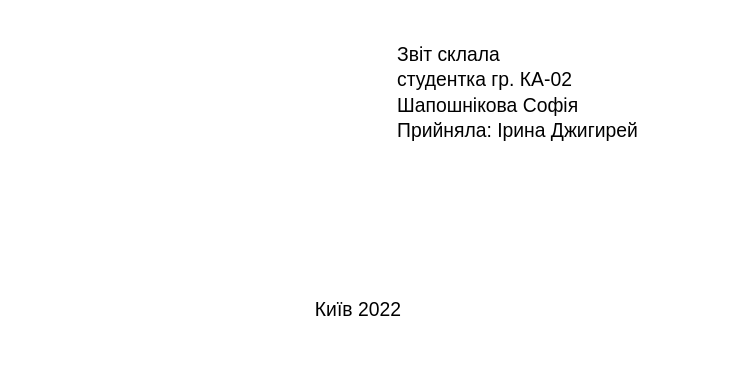

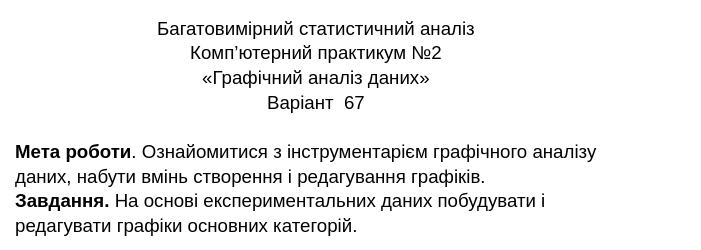

In [1]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
xls = pd.ExcelFile(r"БСА-67.xlsx")

In [3]:
#0 - це номер листа+1 таблиці xlsx, який плануємо зчитати
df = xls.parse(0)

In [4]:
# Виведемо перші 10 рядків таблиці
df.head(10)

,X,Y
0,10.2,74.95
1,10.4,67.17
2,11.8,65.05
3,11.9,65.15
4,12.1,81.24
5,12.3,79.48
6,12.3,77.97
7,12.4,64.36
8,12.6,80.81
9,12.8,74.64


### 1. Робота з діаграмою розсіювання
- змінити колір зовнішнього та внутрішнього тла графіка
- змінити заголовок
- змінити розмір і вигляд маркерів точок графіка
- змінити тип і вигляд лінії підгонки (fitting line)
- змінити вигляд довірчого інтервалу
- змінити діапазони відображення значень випадкових величин та осі

Зобразимо графік:

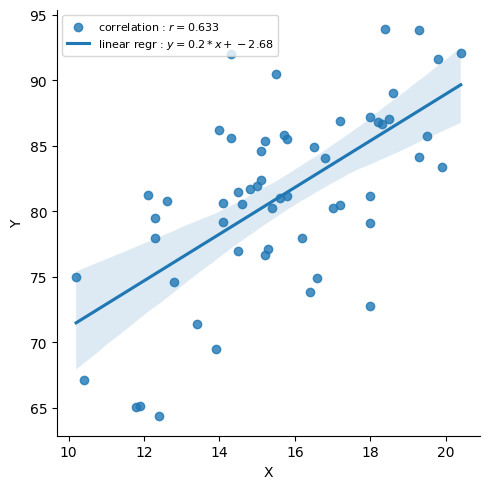

In [5]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['Y'], df['X'])
sns.lmplot(data=df,x="X", y="Y")
plt.legend(labels=['correlation : $r=%3.5s$'%(r_value), 'linear regr : $y=%3.3s*x+%3.5s$'%(slope, intercept)], 
           loc = 'upper left', fontsize=8)

Тепер внесемо зміни: 

In [6]:
# змінимо корір фону: внутрішнього(axes.facecolor) і зовнішнього(figure.facecolor)
sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})

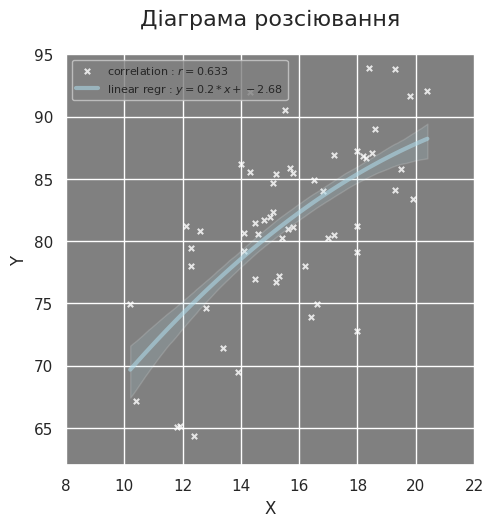

In [7]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['Y'], df['X'])
# змінимо тип і вигляд маркерів: розмір, колір з допомогою scatter_kws і вигляд з допомогою  markers
# змінимо тип і вигляд лінії підгонки: колір, ширину, прозорість з допомогою  line_kws та порядок полноміальної лінійної регресії з допомогою order 
# змінимо розмір довірчих інтервалів з допомогою  ci=50
g = sns.lmplot(data=df,x="X", y="Y",  fit_reg=True , scatter_kws={"s": 15, 'facecolor':'white'}, markers=['x'], line_kws={"color":"lightblue","alpha":0.6,"lw":3}, order=2,  ci=50)
plt.legend(labels=['correlation : $r=%3.5s$'%(r_value), 'linear regr : $y=%3.3s*x+%3.5s$'%(slope, intercept)],
           loc = 'upper left', fontsize=8)

# Додамо заголовок та відформатуємо його розташування
plt.title('Діаграма розсіювання', y=1.05, fontsize = 16)

# Змінимо діапазони відображення значень випадкових величин та осі
g = (g.set(xlim=(8,22), ylim=(62,95)))

### 2. Робота з 2D матрицею діаграм розсіювання та бівимірною 3D гістограмою
 - змінити принаймні п’ять параметрів для кодного з графіків
 - привести діапазон і крок відображення випадкових величин на бівимірній гістограмі у відповідність до значень кореляційної таблиці з п.7 КП №1
 - змінити розташування 3D гістограми у просторі.

In [8]:
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})

Побудуємо 2D матриця діаграм розсіювання:

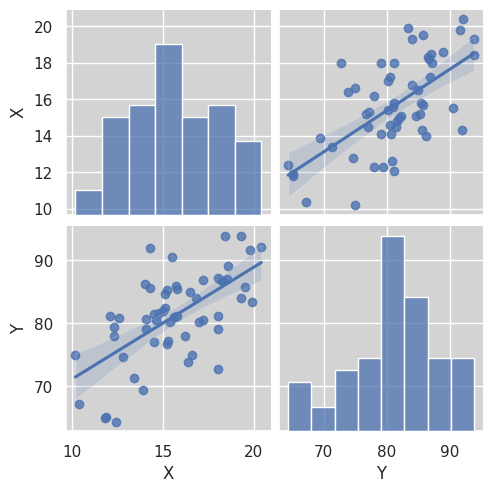

In [9]:
sns.pairplot(df, kind="reg")

Тепер внесемо зміни:

In [10]:
# 1. Змінимо колір внутрішнього та зовнішнього фону графіка
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

Text(0, 2.1, '2D матриця діграми розсіювання')

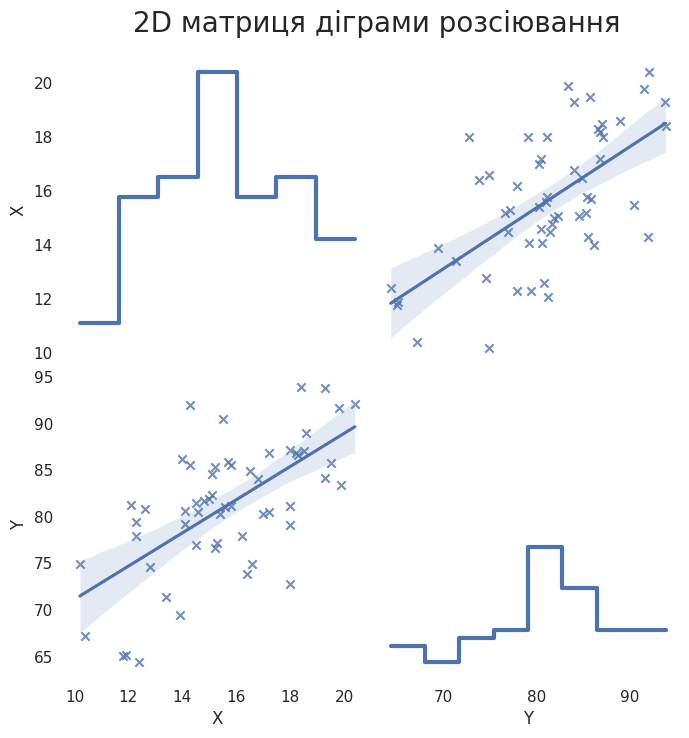

In [11]:
# 2. Змінимо вигляд маркерів у діаграмі розсіювання, прописавши: markers=['x']
# 3. Змінимо розмір графіка, прописавши: height=3.5
# 4. Змінимо вигляд гістограми, прописавши: diag_kws=dict(element='step',fill=False,stat="density",linewidth=3.0)
sns.pairplot(df, kind="reg", markers=['x'], height=3.5, diag_kws=dict(element='step',fill=False,stat="density",linewidth=3.0))

# 5. Додамо заголовок
plt.title('2D матриця діграми розсіювання', x= 0, y=2.1, fontsize = 20)

Побудуємо біфакторну гістограму:

In [12]:
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})

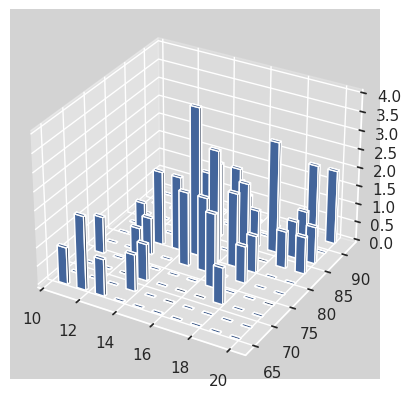

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(df["X"], df["Y"])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

Тепер внесемо зміни:

In [14]:
# 1. Змінимо колір внутрішнього та зовнішнього фону графіка
sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})

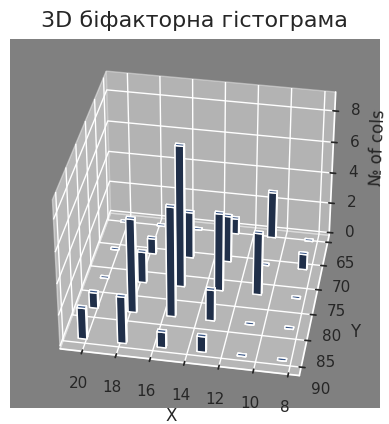

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#2. Змінимо bins та range, щоб привести діапазон і крок відображення випадкових величин на бівимірній гістограмі у відповідність до значень кореляційної таблиці
hist, xedges, yedges = np.histogram2d(df["X"], df["Y"], bins=(6,5), range=[[8, 22], [65, 95]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

#3. Змінимо розташування 3D гістограми у просторі.
ax.view_init(elev=35, azim = 100)

#4. Додамо заголовок
plt.title('3D біфакторна гістограма', y=1.1, fontsize = 16)

#5. Дамо назви осям X, Y, Z
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('№ of cols')

plt.show()

In [16]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

### 3. Побудова піктографіків
- Згенерувати набір даних. Значення спостережень для першої змінної x1 необхідно сформувати на інтервалі [0, n] за формулою $x_1$=Rnd(n), де n – індивідуальний варіант.  Наступні три змінні потрібно сформувати таким чином: $x_2 = x_1 – \frac{n}{2}$; $x_3 = x_1 \cdot \frac{n}{2}$; $x_4 = |x_2 – x_3| + n;$ Значення п’ятої змінної сформувати самостійно на основі перших чотирьох.
- Для згенерованого набору даних побудувати:
1) обличчя Чернова (команда «Icon Plots» вкладки «Graphs», параметр «Chernoff Faces»);
2) кругові діаграми (команда «Icon Plots» вкладки «Graphs», параметр «Pies»);
3) будь-які 3 інші діаграми

In [17]:
# Оскільки варіант даної роботи - 67, візьмемо seed = 67
np.random.seed(67)
n = 67 #тут n - номер варіанту

Згенеруємо значення змінної х1:

In [18]:
x1 = [int(np.random.randint(0, n)) for i in range(10)]

In [19]:
gen_df = pd.DataFrame({'x1':x1})

Отримаємо значення всіх інших змінних за формулами, прописаними в завданні:

In [20]:
gen_df["x2"]=gen_df["x1"].apply(lambda x: abs(x-n/2))
gen_df["x3"]=gen_df.apply(lambda x: x["x1"]*x["x2"]/n, axis=1)
gen_df["x4"]=gen_df.apply(lambda x: abs(x["x2"]- x["x3"])+n, axis=1)
gen_df["x5"]=gen_df.apply(lambda x: x["x4"]%x["x1"], axis=1)

Отримали згенерований набір даних:

In [21]:
gen_df

,x1,x2,x3,x4,x5
0,53,19.5,15.425373,71.074627,18.074627
1,7,26.5,2.768657,90.731343,6.731343
2,9,24.5,3.291045,88.208955,7.208955
3,35,1.5,0.783582,67.716418,32.716418
4,22,11.5,3.776119,74.723881,8.723881
5,45,11.5,7.723881,70.776119,25.776119
6,35,1.5,0.783582,67.716418,32.716418
7,23,10.5,3.604478,73.895522,4.895522
8,53,19.5,15.425373,71.074627,18.074627
9,35,1.5,0.783582,67.716418,32.716418


Збережемо таблицю зі згенеровними даними

In [22]:
gen_df.to_csv("generated_data_for_task3.csv", index=False)

**Обличчя Чернова**

In [121]:
# Завантажимо пакет для побудови піктографіків "обличчя Чернова"
!pip install ChernoffFace

In [24]:
# Підключимо весь функціонал з бібліотеки для побудови піктографіків "обличчя Чернова"
from ChernoffFace import *

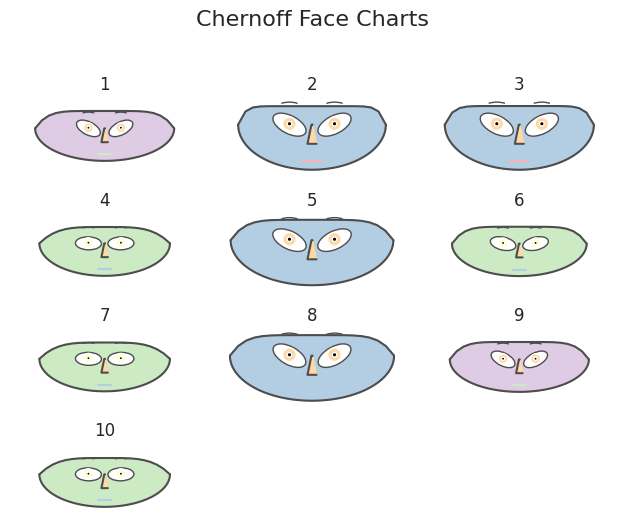

In [25]:
fig = chernoff_face(data=gen_df, 
                    titles=[str(x+1) for x in list(range(len(gen_df)))], 
                    color_mapper=matplotlib.cm.Pastel1)

fig.tight_layout()
fig.suptitle('Chernoff Face Charts', fontsize=16, y=1.1)
plt.show()

**Кругові діаграми**

In [26]:
previous_r, center = 0, 0
centers = []
for i, key in enumerate(gen_df.keys()):
    values = gen_df[key]
    r = (np.sqrt( (values[0])/ np.pi*3) *-1)
    center += previous_r + r
    centers.append(abs(center))
    previous_r = -10 + r   

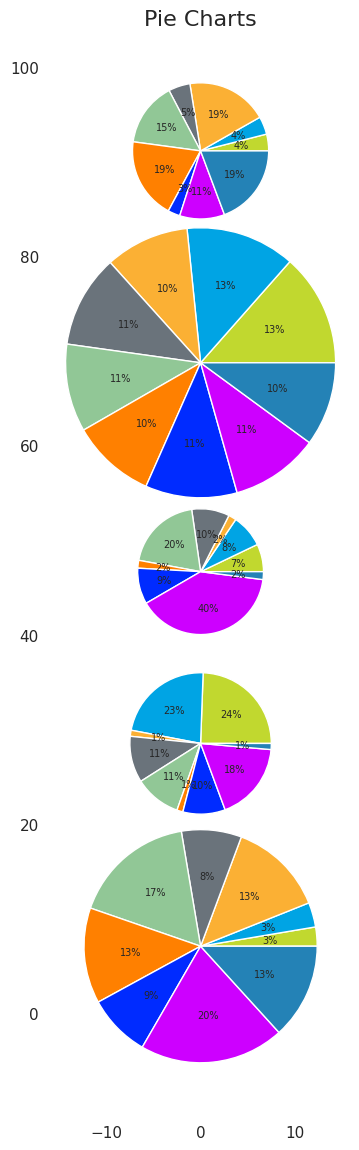

In [27]:
fig, ax = plt.subplots(1, figsize=(10,14))
for i, key in enumerate(gen_df.keys()):
            values = gen_df[key]
            plt.pie(values[1:], 
            autopct='%.0f%%', 
            radius=np.sqrt((values[0])/np.pi)*3, 
            textprops={'fontsize':7}, 
            center=(0, centers[i]), 
            colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B', "#91C796", "#FF8000", "#002BFF", '#CD00FF','#2482B6', '#F34D3A'],
            frame= True)
plt.title('Pie Charts', y=1, fontsize = 16)
plt.show()

**Будь-які 3 інші діаграми**:
 - Area Chart
 - Waffle Chart
 - Violin Plot

**Area Chart**

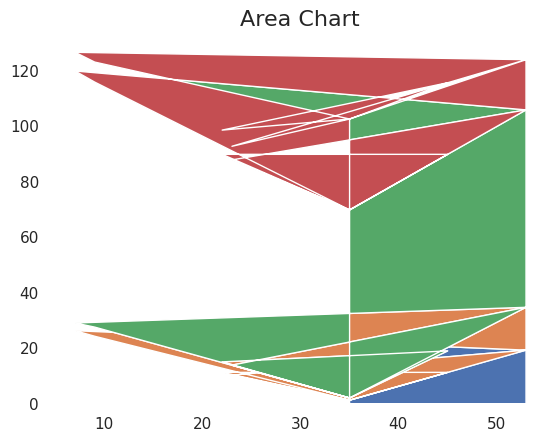

In [28]:
plt.stackplot(gen_df.x1,gen_df.x2,gen_df.x3,gen_df.x4,gen_df.x5)
plt.title('Area Chart', y=1, fontsize = 16)
plt.show()

**Violin Plot**

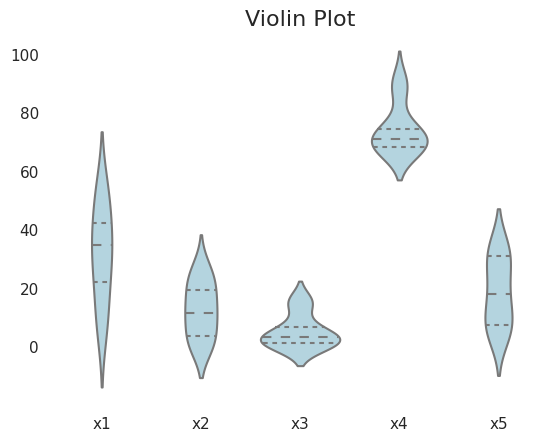

In [29]:
sns.violinplot(data=np.array(gen_df), split=True, inner="quartile", palette=["lightblue"]).set_xticklabels(['x1','x2','x3','x4','x5'])
plt.title('Violin Plot', y=1, fontsize = 16)
plt.show()

**Waffle Chart**

In [120]:
# Завантажимо пакет для побудови Waffle піктографіків з https://github.com/gyli/PyWaffle
!pip install pywaffle

In [31]:
# підключимо функціонал для побудови Waffle піктографіків
from pywaffle import Waffle

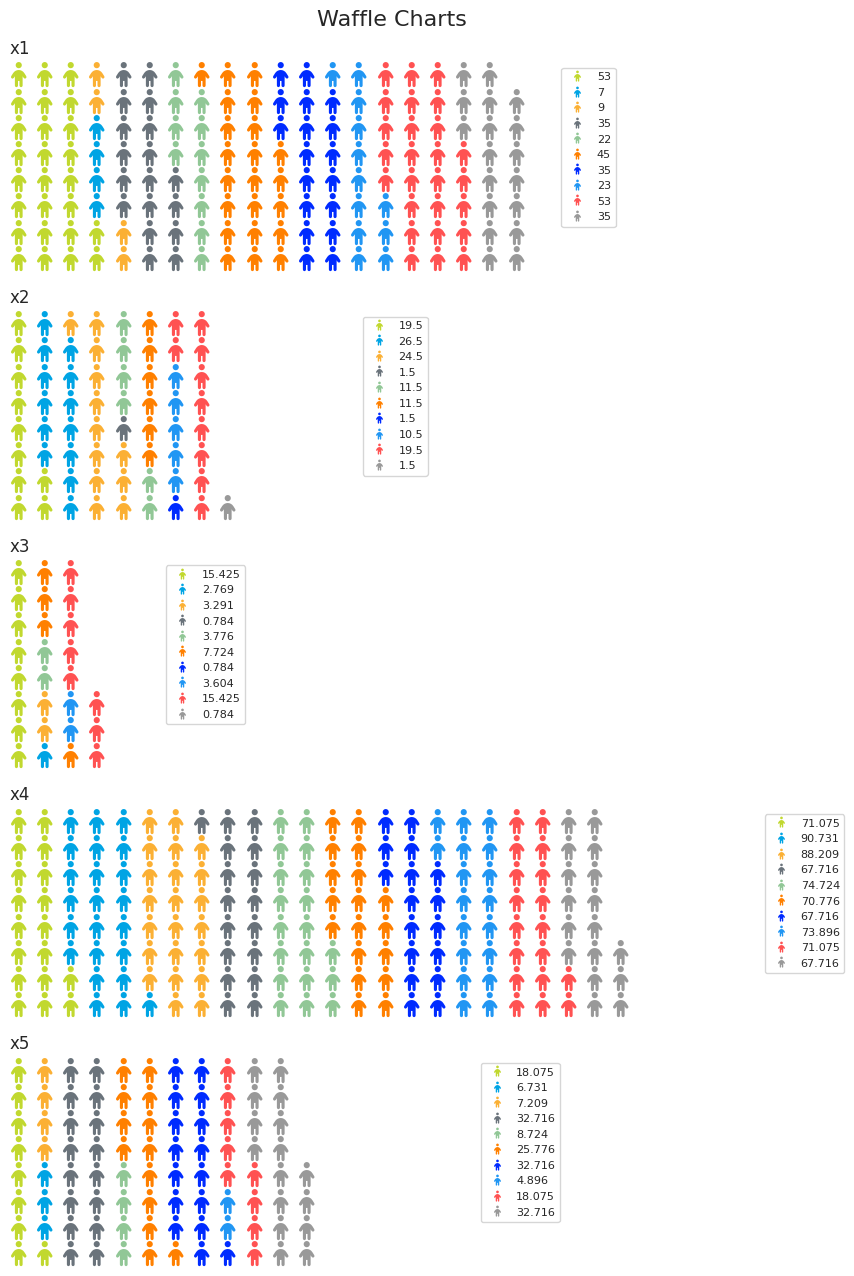

In [32]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        511: {
            'values': gen_df["x1"]/2,
            'labels': [str(i) for i in gen_df["x1"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'x1', 'loc': 'left', 'fontsize': 12},
            'icons':'child','icon_size':18, 'icon_legend':True
        },
        512: {
            'values': gen_df["x2"]/2,
            'labels': [str(round(i,3)) for i in gen_df["x2"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.5, 1), 'fontsize': 8},
            'title': {'label': 'x2', 'loc': 'left', 'fontsize': 12},
            'icons':'child','icon_size':18, 'icon_legend':True
        },
        513: {
            'values': gen_df["x3"]/2,
            'labels': [str(round(i,3)) for i in gen_df["x3"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.5, 1), 'fontsize': 8},
            'title': {'label': 'x3', 'loc': 'left', 'fontsize': 12},
            'icons':'child','icon_size':18, 'icon_legend':True
        },
        514: {
            'values': gen_df["x4"]/4,
            'labels': [str(round(i,3)) for i in gen_df["x4"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'x4', 'loc': 'left', 'fontsize': 12},
            'icons':'child','icon_size':18, 'icon_legend':True
        },
        515: {
            'values': gen_df["x5"]/2,
            'labels': [str(round(i,3)) for i in gen_df["x5"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.5, 1), 'fontsize': 8},
            'title': {'label': 'x5', 'loc': 'left', 'fontsize': 12},
            'icons':'child','icon_size':18, 'icon_legend':True
        }
    },
    rows=8,
    colors=["#C1D82F", "#00A4E4", "#FBB034", '#6A737B', "#91C796", "#FF8000", "#002BFF","#2196f3", "#ff5252", "#999999"],
    figsize=(8, 13)
)

fig.suptitle('Waffle Charts', fontsize=16)
plt.show()

### 4. Побудова 3D графіків та 2D Contour Plot
 - Згенерувати набір даних для трьох змінних-стовпців і ста спостережень рядків. Значення спостережень для першої змінної x необхідно сформувати на інтервалі [0, n] за формулою x = Rnd(n), де n - індивідуальний варіант, значення другої за формулою $y = (Rnd(n) – (\frac{n}{2}))^2$, а значення третьої як $z = x \cdot y^3 – y \cdot x^3$ або будь-як інакше
 - Побудувати і редагувати 3D графік поверхні («Scatterplot») для функції z=φ(x, y).
 - Побудувати і редагувати 3D графік поверхні («Surface Plot») для функції z=φ(x, y).
 - Побудувати і редагувати 2D графік поверхні («Contour plot») для функції z=φ(x, y).
 - Змінити щонайменше п’ять його параметрів кожного графіка (відобразити або приховати 2D проекцію, змінити кут відображення, змінити стиль контуру)

Згенеруємо значення змінних Х і Y:

In [33]:
x = [int(np.random.randint(0, n)) for i in range(100)]
y = [(int(np.random.randint(0, n))-n/2)**2 for i in range(100)]
task4_df = pd.DataFrame({'X':x, 'Y': y})

Отримаємо значення Z:

In [34]:
task4_df["Z"]=task4_df.apply(lambda x: x["X"]*x["Y"]**3-x["Y"]*x["X"]**3, axis=1)

Отримали згенерований набір даних:

In [35]:
task4_df

,X,Y,Z
0,54,650.25,1.474448e+10
1,31,1056.25,3.649956e+10
2,55,182.25,3.026176e+08
3,45,56.25,2.883252e+06
4,33,240.25,4.489852e+08
...,...,...,...
95,14,506.25,1.815060e+09
96,40,380.25,2.174879e+09
97,33,420.25,2.434170e+09
98,0,650.25,0.000000e+00


**3D Scatterplot**

In [37]:
from mpl_toolkits.mplot3d import Axes3D

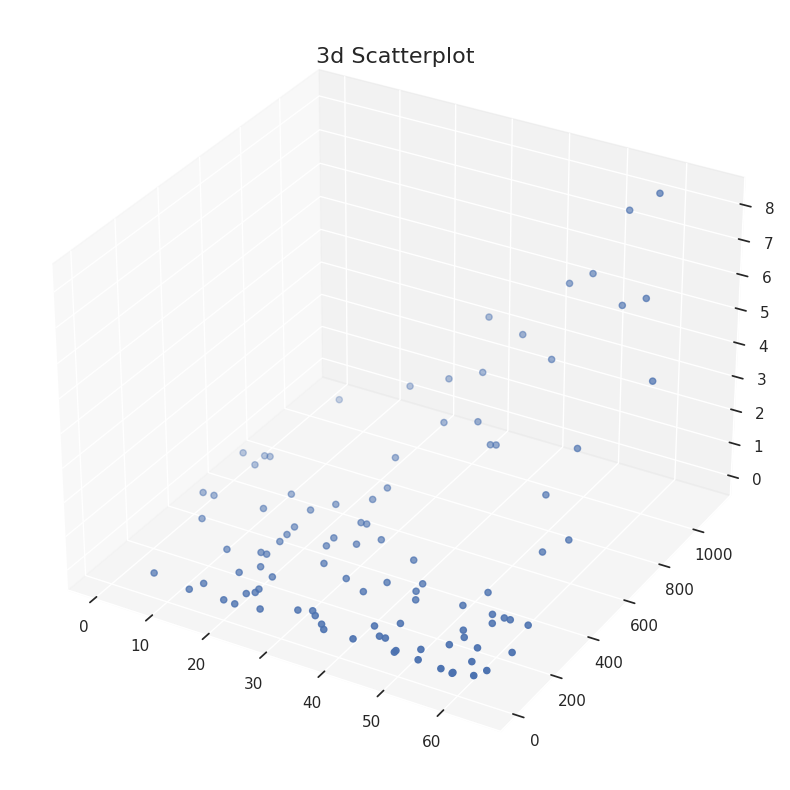

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(task4_df["X"], task4_df["Y"], task4_df["Z"])
plt.title('3d Scatterplot', fontsize=16,y=1)
plt.show()

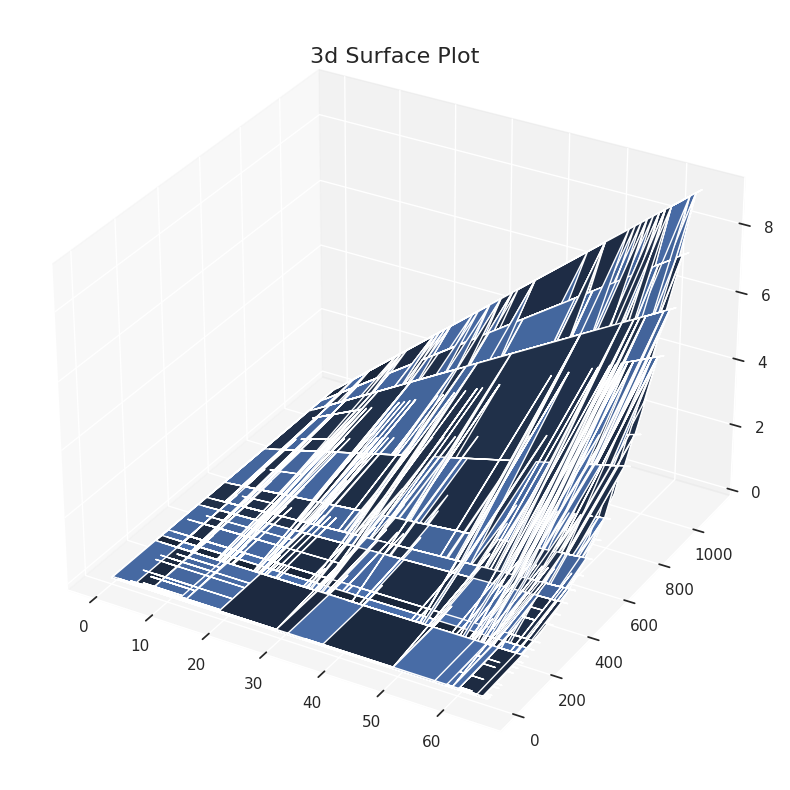

In [39]:
X, Y = np.meshgrid(task4_df["X"], task4_df["Y"])
Z = X*Y**3-Y*X**3
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)
plt.title('3d Surface Plot', fontsize=16, y=1)
plt.show()


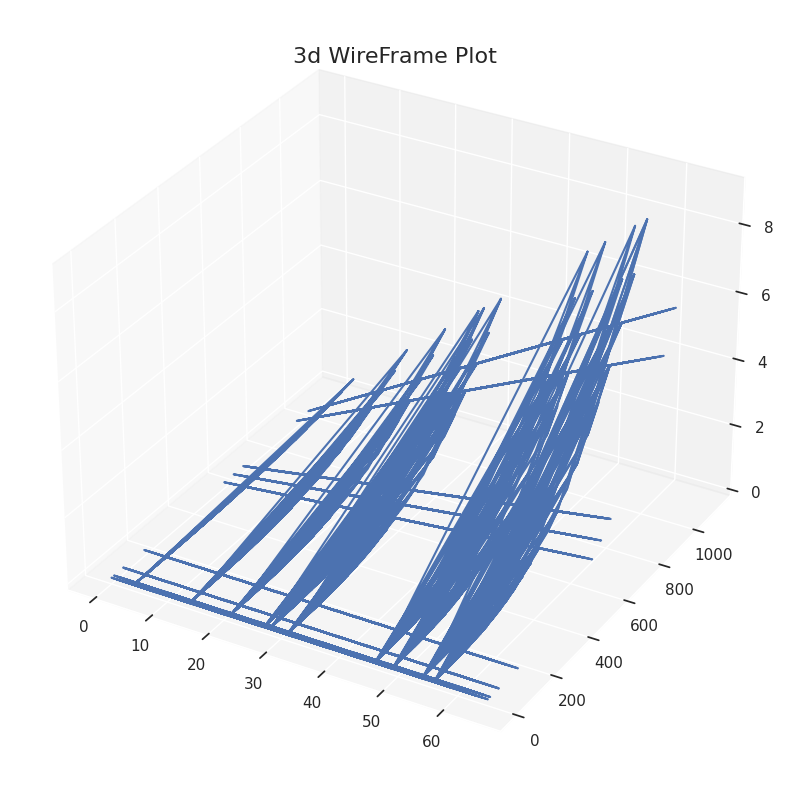

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.title('3d WireFrame Plot', fontsize=16, y=1)
plt.show()

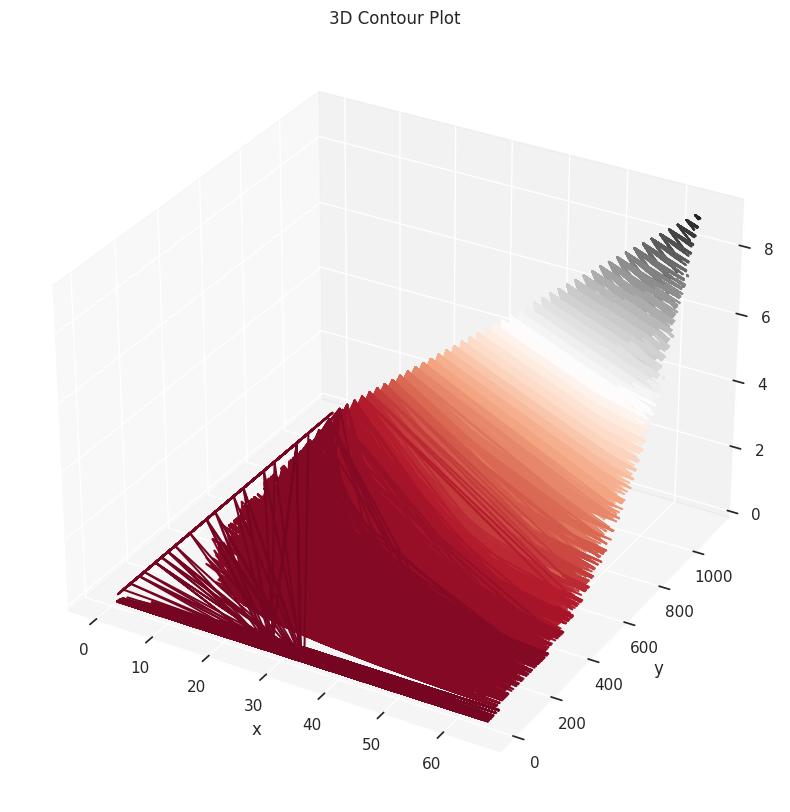

In [41]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='RdGy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Contour Plot')
plt.show()

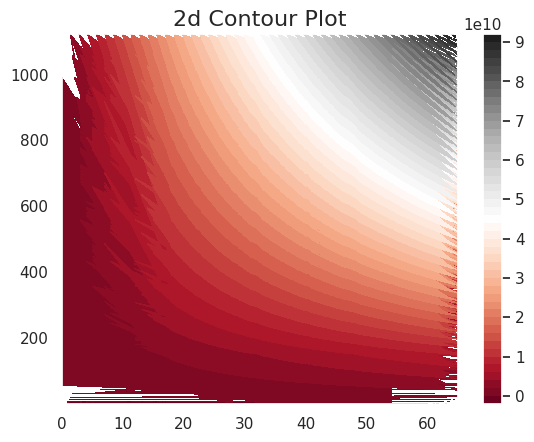

In [42]:
plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()
plt.title('2d Contour Plot', fontsize=16, y=1)
plt.show()

Тепер будемо вносити зміни

In [43]:
# 1. Змінимо колір внутрішнього та зовнішнього фону графіка
sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'white'})

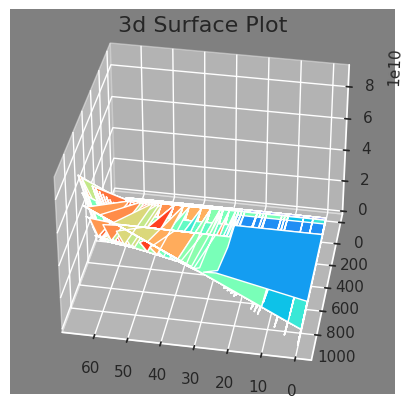

In [44]:
X, Y = np.meshgrid(task4_df["X"], task4_df["Y"])
Z = X*Y**3-Y*X**3

# 2 змінимо розмір графіка на 5:5
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 3 add rcount = 20
# 4 add cmap='rainbow'
ax.plot_surface(X, Y, Z, rcount = 20, cmap='rainbow')
plt.title('3d Surface Plot', fontsize=16, y=1)

# 5 зміна кута розташування грфіка у просторі.
ax.view_init(elev=35, azim = 100)

plt.show()

In [45]:
# 1. Змінимо колір внутрішнього та зовнішнього фону графіка
sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'white'})

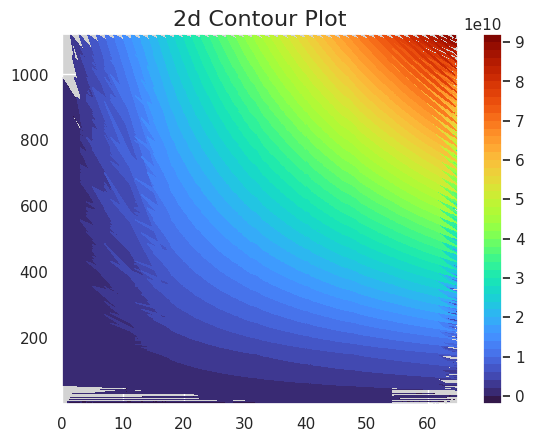

In [46]:
# 1 cmap="turbo"
# corner_mask=True
plt.contourf(X, Y, Z, 50, cmap="turbo", corner_mask=True)
plt.colorbar()
plt.title('2d Contour Plot', fontsize=16, y=1)
plt.show()

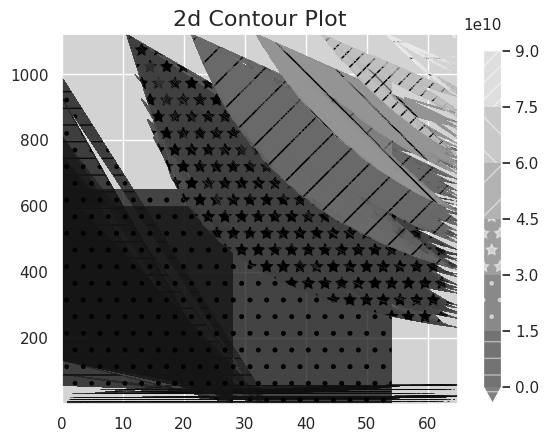

In [47]:
fig1, ax1 = plt.subplots()
# 3 add hatches=['-', '.', '*', '/', '\\', '//']
# 4 add extend='both'
# 5 add alpha=0.5
cs = ax1.contourf(X, Y, Z, hatches=['-', '.', '*', '/', '\\', '//'],
                  cmap='gray', extend='both', alpha=0.5)
fig1.colorbar(cs)

plt.title('2d Contour Plot', fontsize=16, y=1)
plt.show()

### 5. Побудова тернарного графіка
- До набору даних четвертий стовпець-змінну v. Значення змінної сформувати будь-яким способом.
- Побудувати і редагувати тернарний графік («Ternary plot») 

In [48]:
task4_df["v"]=task4_df.apply(lambda x: np.sqrt(abs(x["X"]-x["Y"])), axis=1)

Отримали набір даних:

In [49]:
task4_df

,X,Y,Z,v
0,54,650.25,1.474448e+10,24.418231
1,31,1056.25,3.649956e+10,32.019525
2,55,182.25,3.026176e+08,11.280514
3,45,56.25,2.883252e+06,3.354102
4,33,240.25,4.489852e+08,14.396180
...,...,...,...,...
95,14,506.25,1.815060e+09,22.186708
96,40,380.25,2.174879e+09,18.445867
97,33,420.25,2.434170e+09,19.678669
98,0,650.25,0.000000e+00,25.500000


Збережемо таблицю зі згенерованими даними

In [122]:
task4_df.to_csv("generated_data_for_task4.csv", index=False)

**Ternary Plot**

In [61]:
# Завантажимо пакет для побудови тернарних графіків
!pip install python-ternary

In [74]:
import ternary

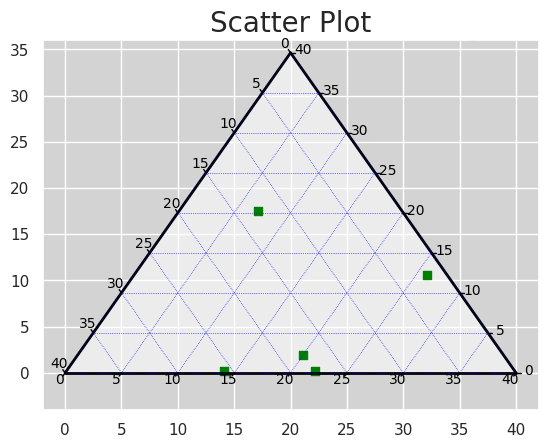

In [114]:
scale = 40
figure, tax = ternary.figure(scale=scale)
tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
tax.scatter(np.array(task4_df), marker='s', color='green')
tax.ticks(axis='lbr', linewidth=1, multiple=5)

tax.show()

Внесемо зміни

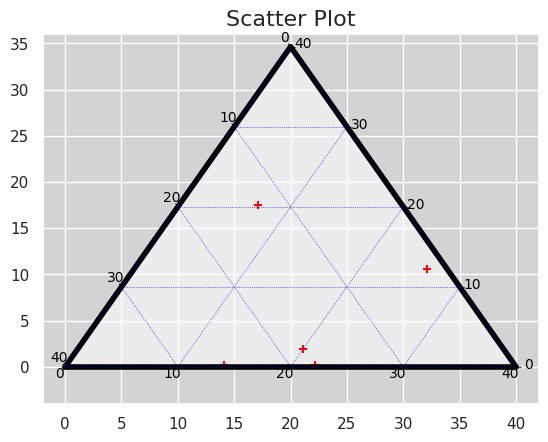

In [119]:
figure, tax = ternary.figure(scale=40)
tax.set_title("Scatter Plot", fontsize=16)
tax.boundary(linewidth=4.0)
tax.gridlines(multiple=10, color="blue")
tax.scatter(np.array(task4_df), marker='+', color='red')
tax.ticks(axis='lbr', linewidth=0.5, multiple=10)

tax.show()

### Висновки
<!-- На мій погляд, найкраще використовувати мови програмування, накшталт Python або R для проведення дослідницького аналізу даних, адже вони мають достатньо бібліотек та пакетів, які дозволяють розробляти власний або налаштовувати готовий функціонал під свої задачі. -->
<!-- Порівняємо використання згрупованих даних тдля грубого оцінювання параметрів з отриманими значеннями на всіх даних. -->
<!-- Отримуємо різницю в значеннях, наприклад коефіцієнт кореляції 0.633812 на повному наборі даних та 0,688 на згрупованому. Отже, бачимо, що згруповані дані показують гіршу точність. -->

Під час виконання роботи було побудовано та внесено зміни до 2D діаграми розсіювання, 2D матриці розсіювання, бівимірної 3D гістограми, 5 різних видів піктографіків, 3D діаграми розсіювання, 3D графіку поверхні, 2D контурної діаграми, 3D контурної діаграми, 2D тернатроного графіка